In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY1_2023.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,10-01-2023 20:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,10-01-2023 20:15,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,10-01-2023 20:30,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,10-01-2023 20:45,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,10-01-2023 21:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,12-06-2023 20:15,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,12-06-2023 20:30,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,12-06-2023 20:45,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,12-06-2023 21:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.0,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.0,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.0,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.0,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.0,28.550000,67.583333,7.116667,8.083333


In [4]:
df2.isnull().sum()

Datetime       0
id          4460
field1      4460
field2      4460
field3      4460
field4      4460
field5      4460
field6      4460
field7      4460
field8      4460
dtype: int64

In [5]:
df2.fillna(method = 'ffill', inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# StatsForecastAutoETS Model

In [8]:
import pandas as pd
from darts.models import StatsForecastAutoETS

# Train the model for target1
model1 = StatsForecastAutoETS()
model1.fit(train1)

# Test the model for target1
prediction1 = model1.predict(len(val1))


# Train the model for target2
model2 = StatsForecastAutoETS()
model2.fit(train2)

# Test the model for target2
prediction2 = model2.predict(len(val2))


# Train the model for target3
model3 = StatsForecastAutoETS()
model3.fit(train3)

# Test the model for target3
prediction3 = model3.predict(len(val3))


# Train the model for target4
model4 = StatsForecastAutoETS()
model4.fit(train4)

# Test the model for target4
prediction4 = model4.predict(len(val4))


# Train the model for target7
model7 = StatsForecastAutoETS()
model7.fit(train7)

# Test the model for target7
prediction7 = model7.predict(len(val7))


# Train the model for target8
model8 = StatsForecastAutoETS()
model8.fit(train8)

# Test the model for target8
prediction8 = model8.predict(len(val8))


In [14]:
from darts.metrics import mape, rmse, mae

# Calculate the RMSE, MAE, and MAPE for each model's predictions
metrics_dict = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': []
}

def calculate_metrics(target, prediction, model_name):
    # Adding a small positive constant to the series
    epsilon = 1e-8
    target += epsilon
    prediction += epsilon
    
    rmse_val = rmse(target, prediction)
    mae_val = mae(target, prediction)
    mape_val = mape(target, prediction)
    
    metrics_dict['Model'].append(model_name)
    metrics_dict['RMSE'].append(rmse_val)
    metrics_dict['MAE'].append(mae_val)
    metrics_dict['MAPE'].append(mape_val)

calculate_metrics(val1, prediction1, 'model1')
calculate_metrics(val2, prediction2, 'model2')
calculate_metrics(val3, prediction3, 'model3')
calculate_metrics(val4, prediction4, 'model4')
calculate_metrics(val7, prediction7, 'model7')
calculate_metrics(val8, prediction8, 'model8')

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the metrics to a CSV file
metrics_df.to_csv('StatsForecastAutoETS_2.csv', index=False)

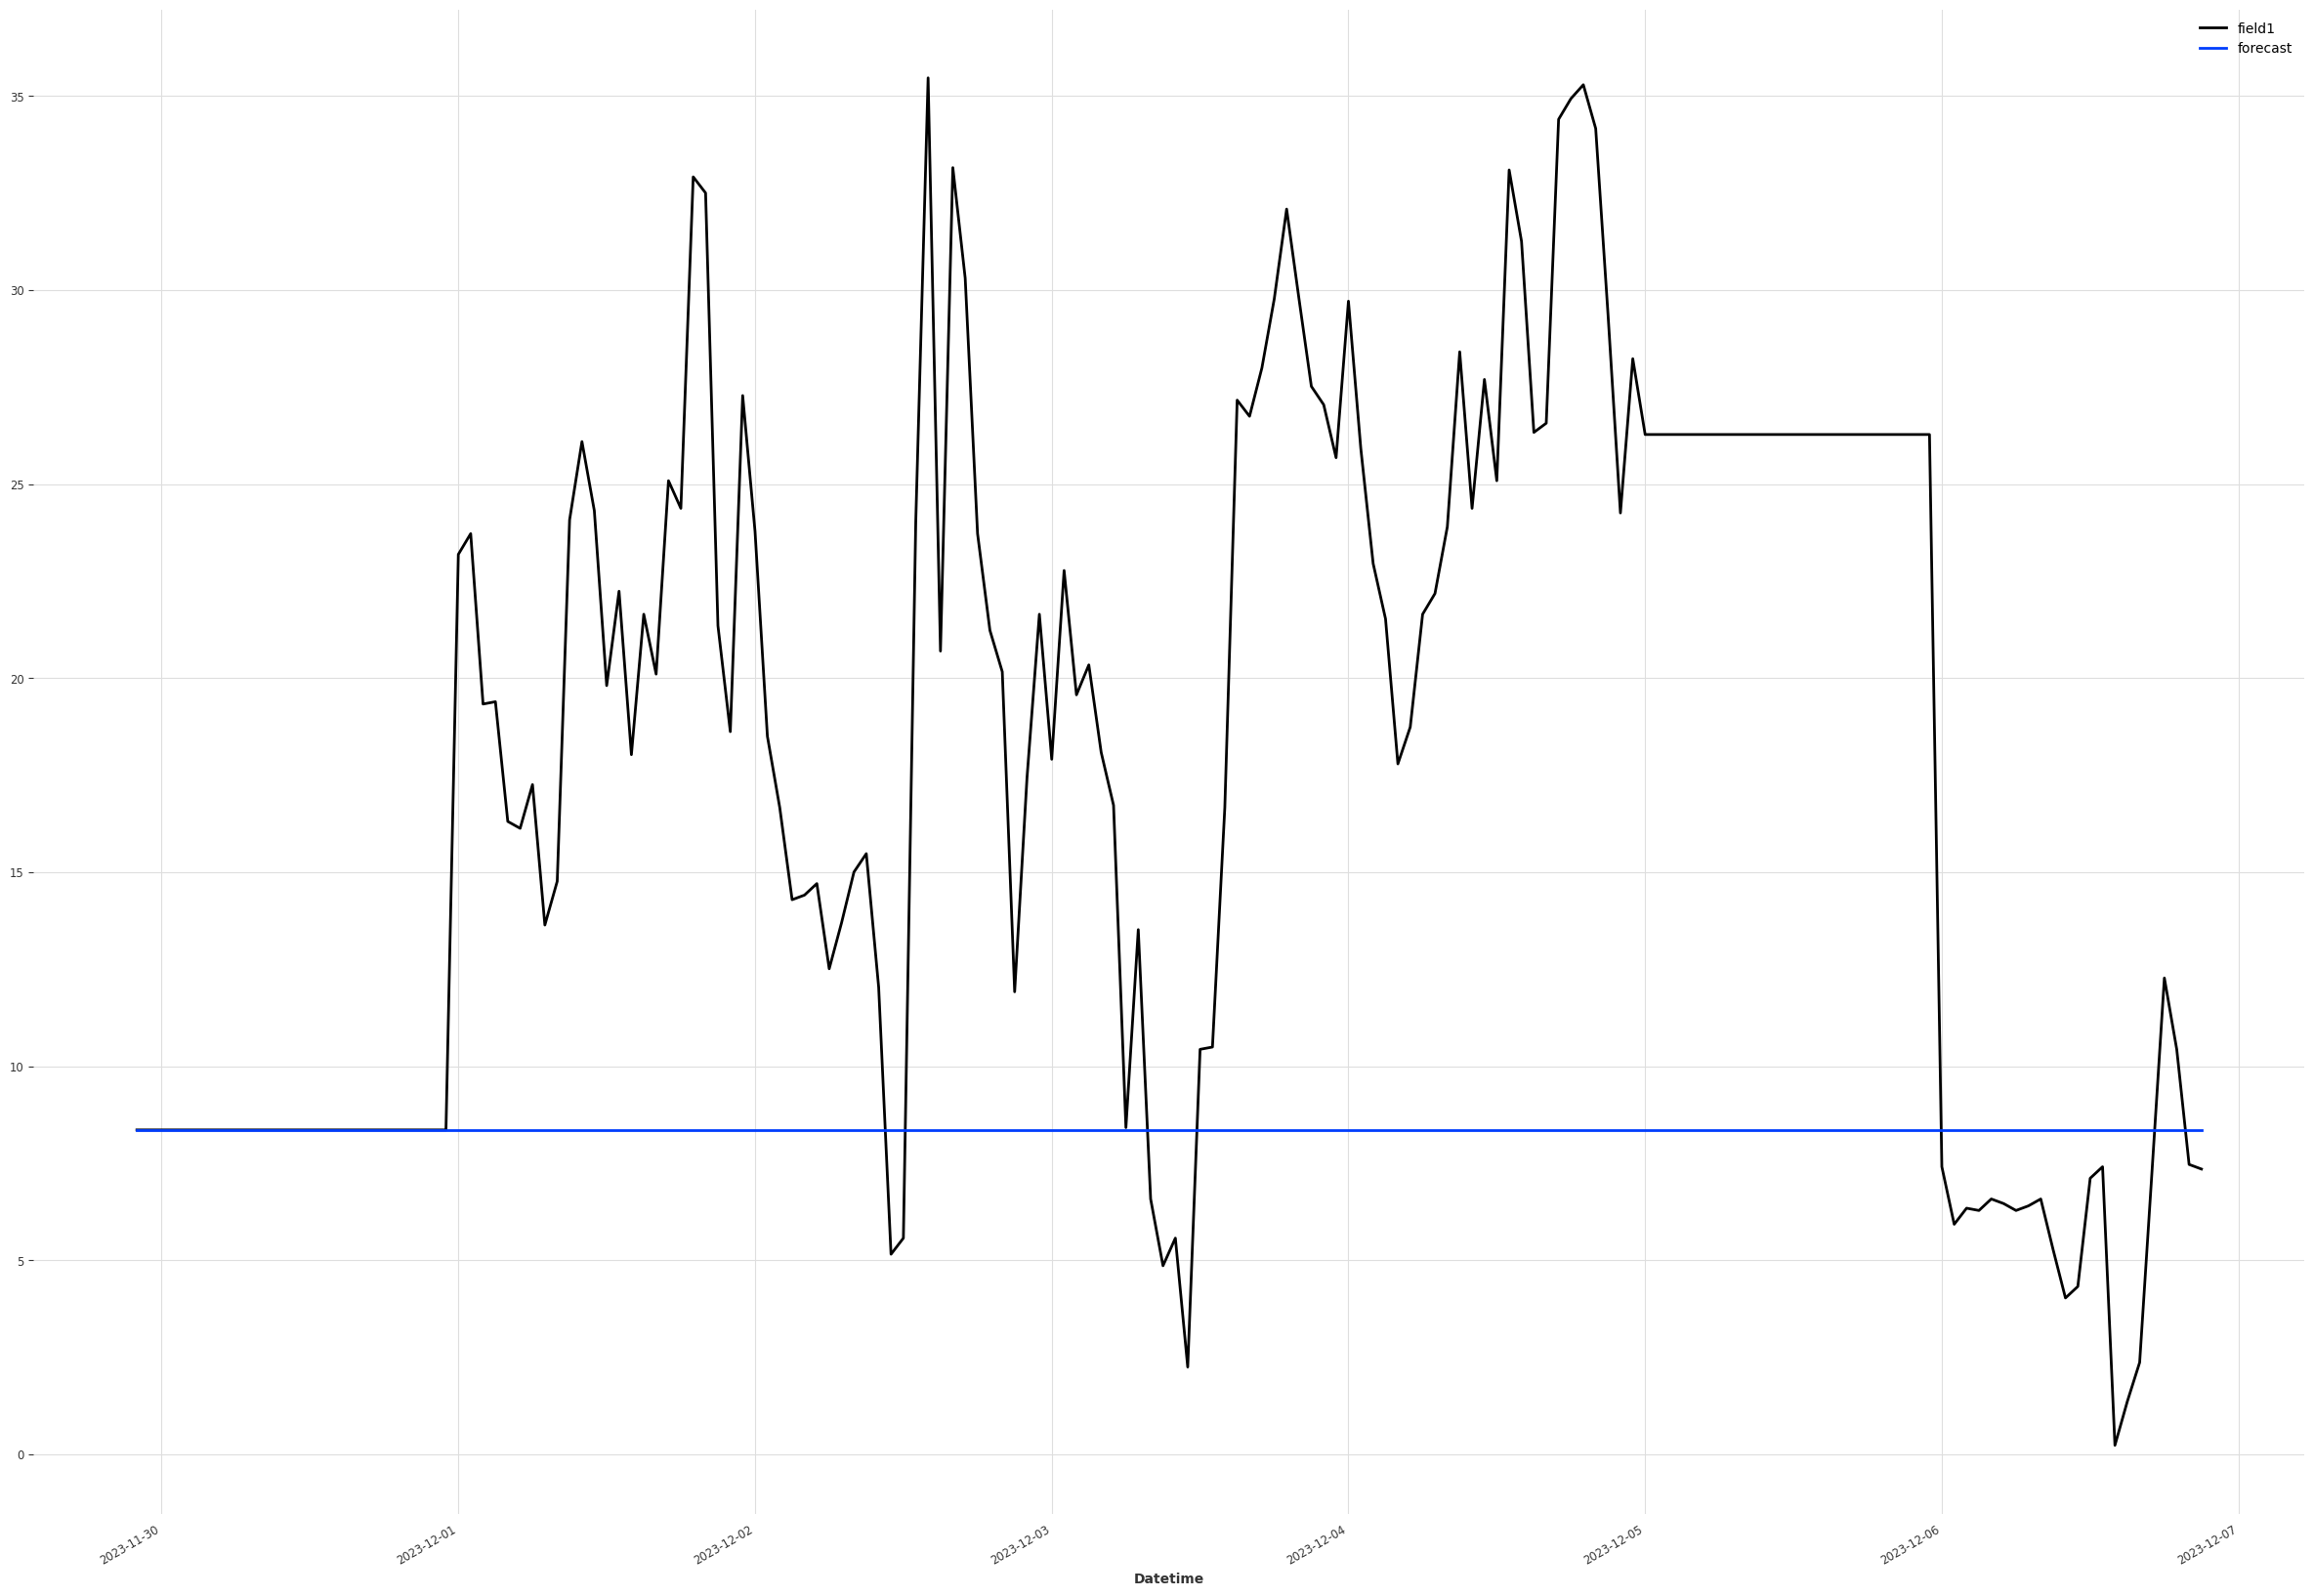

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

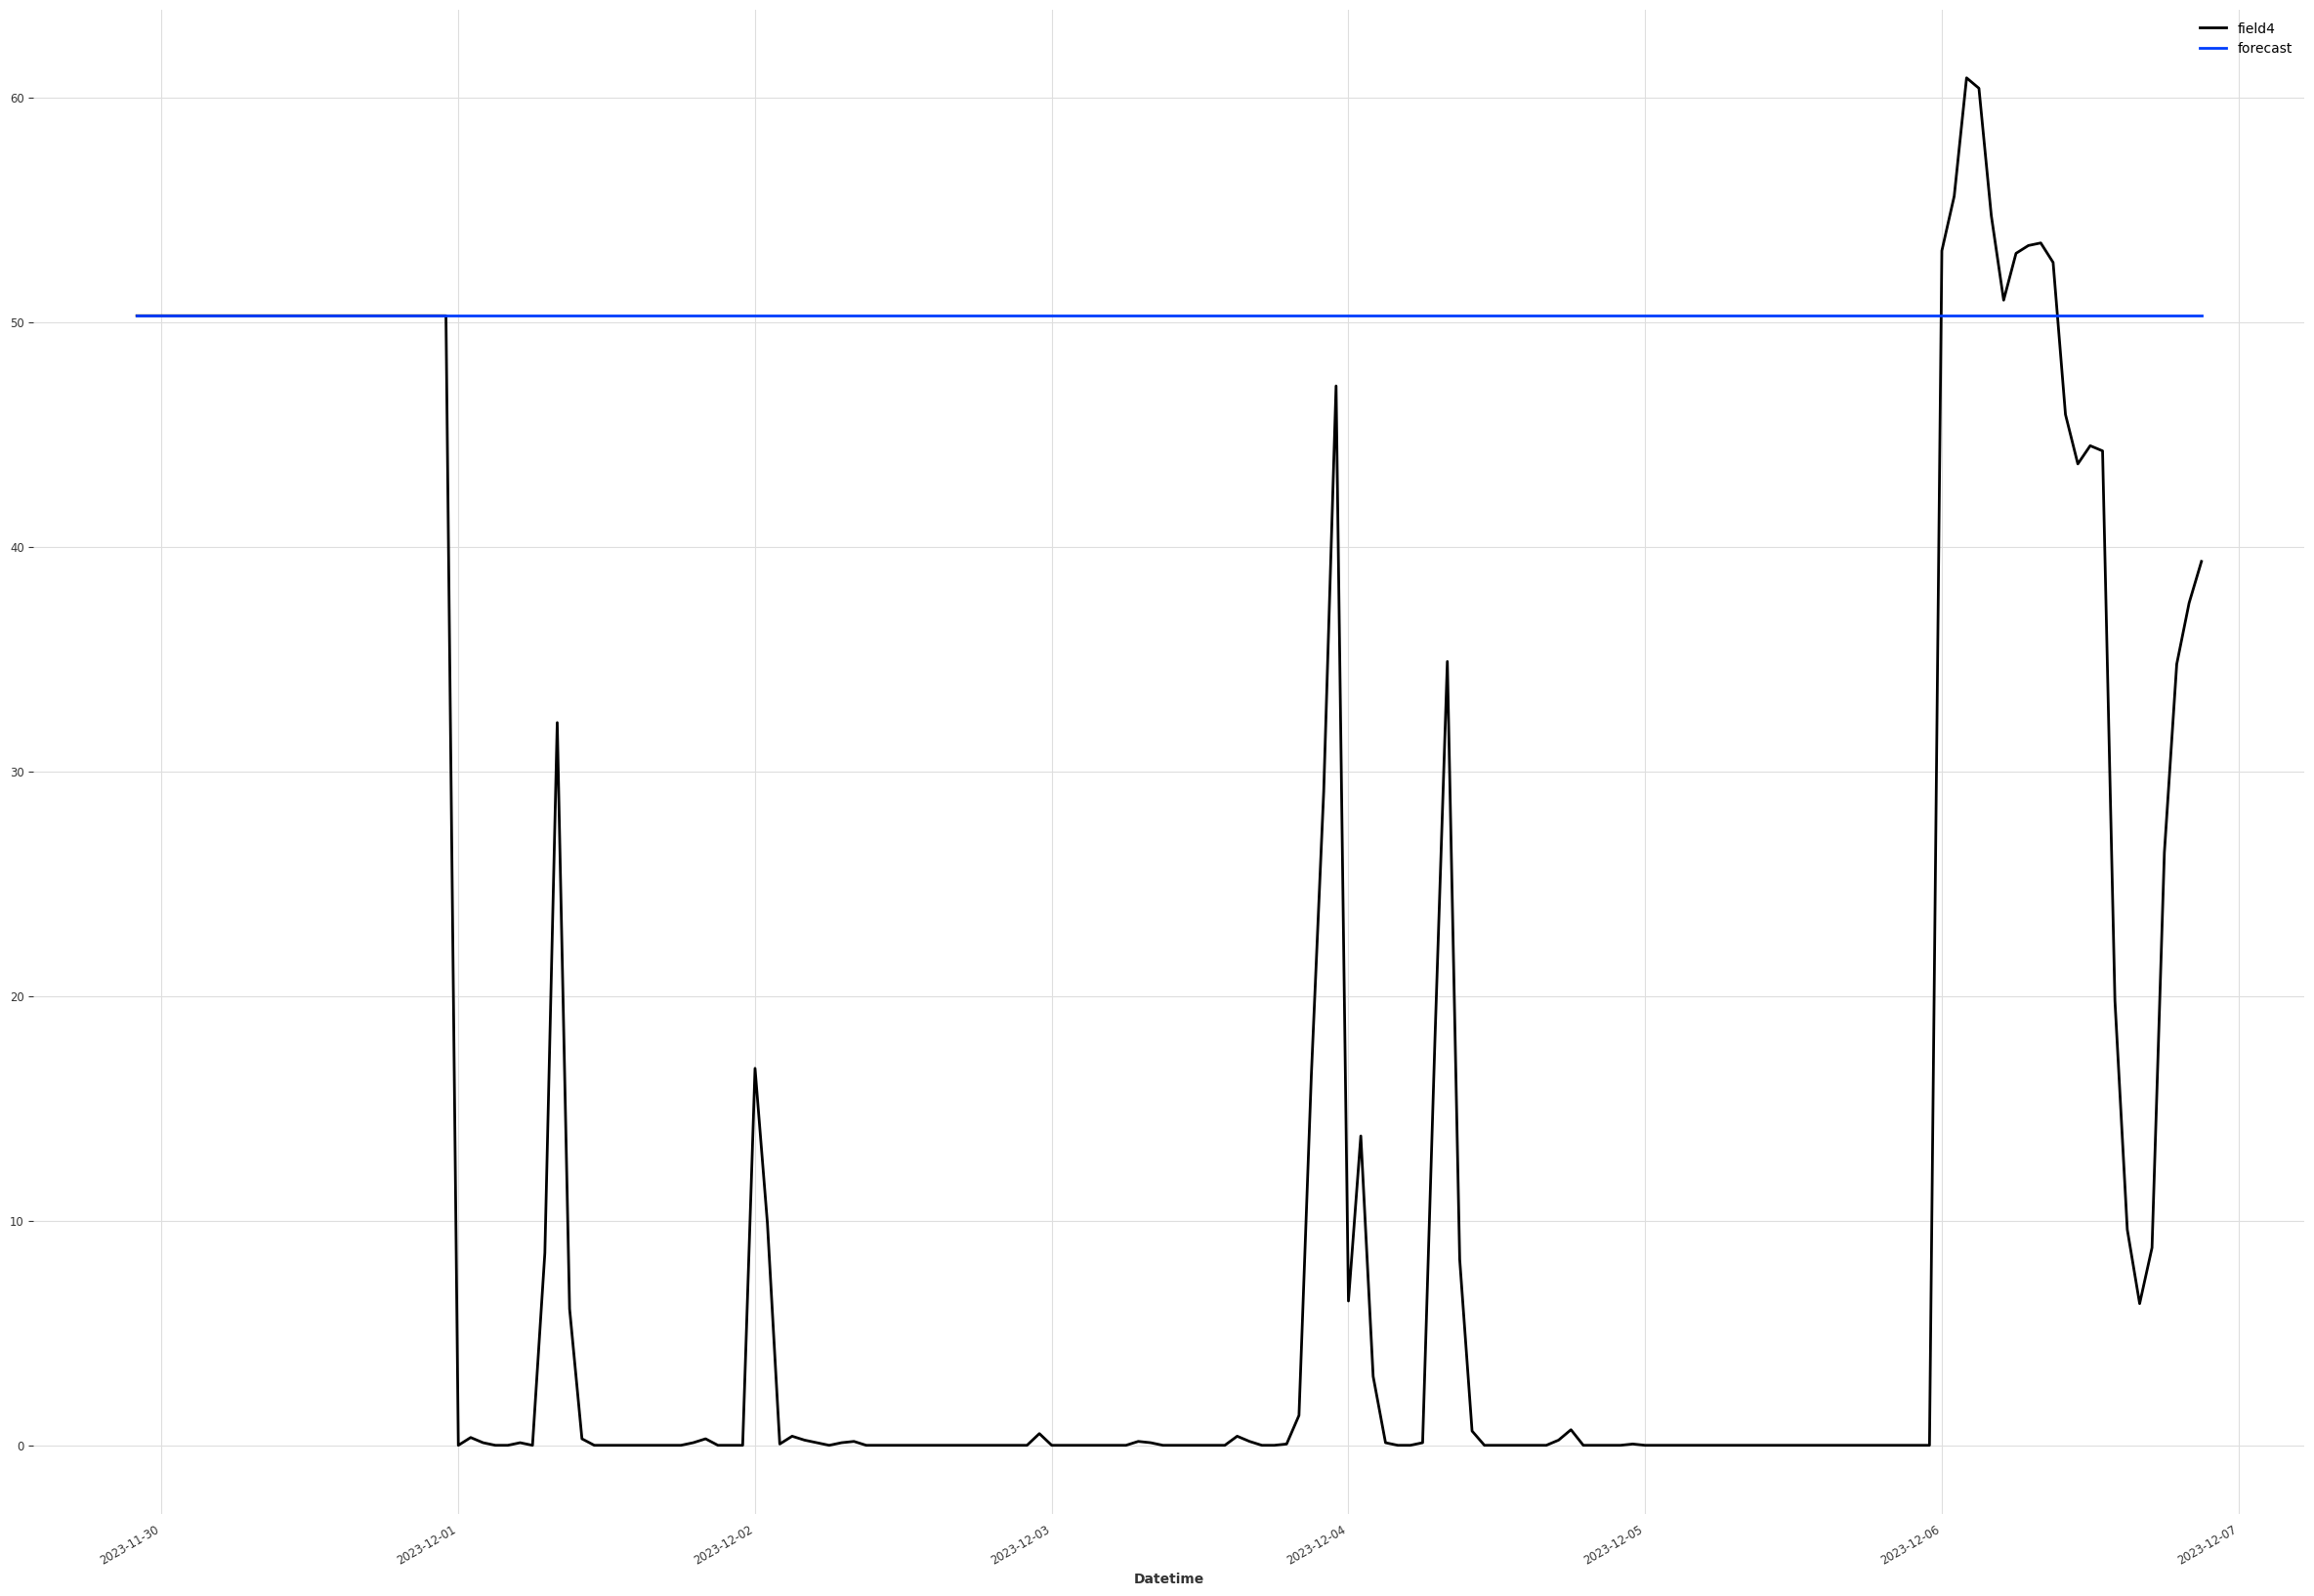

In [16]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

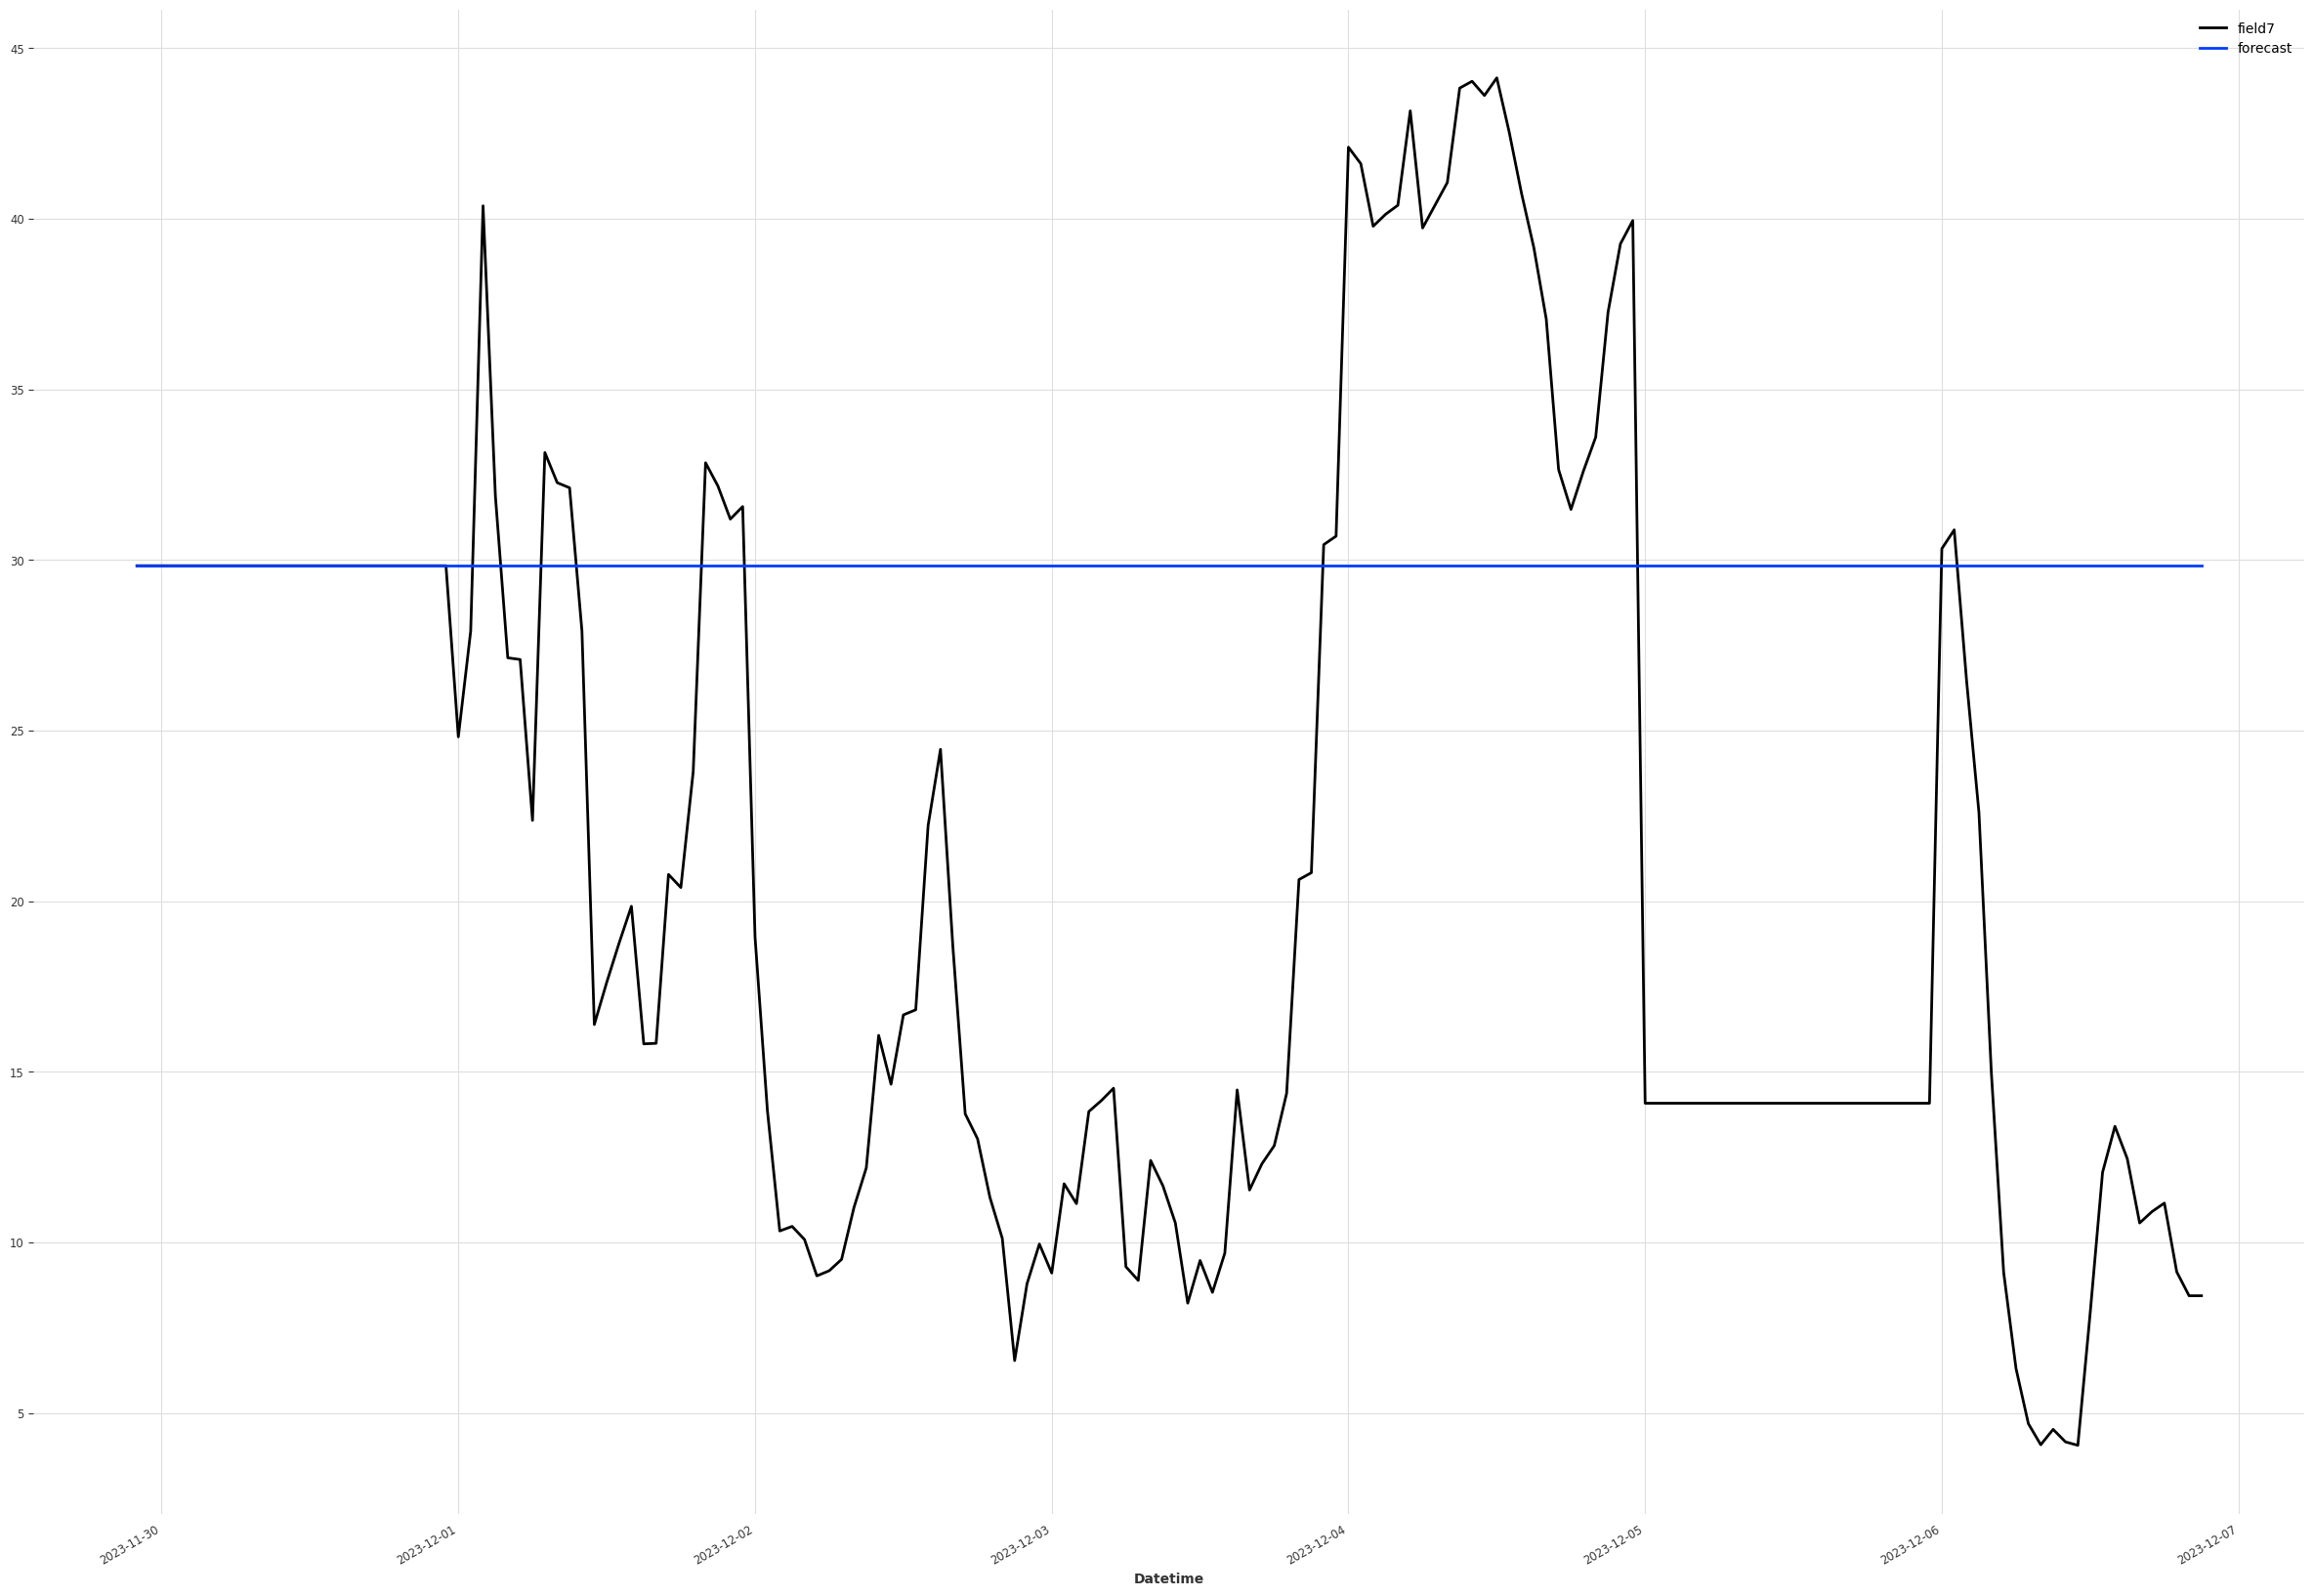

In [17]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

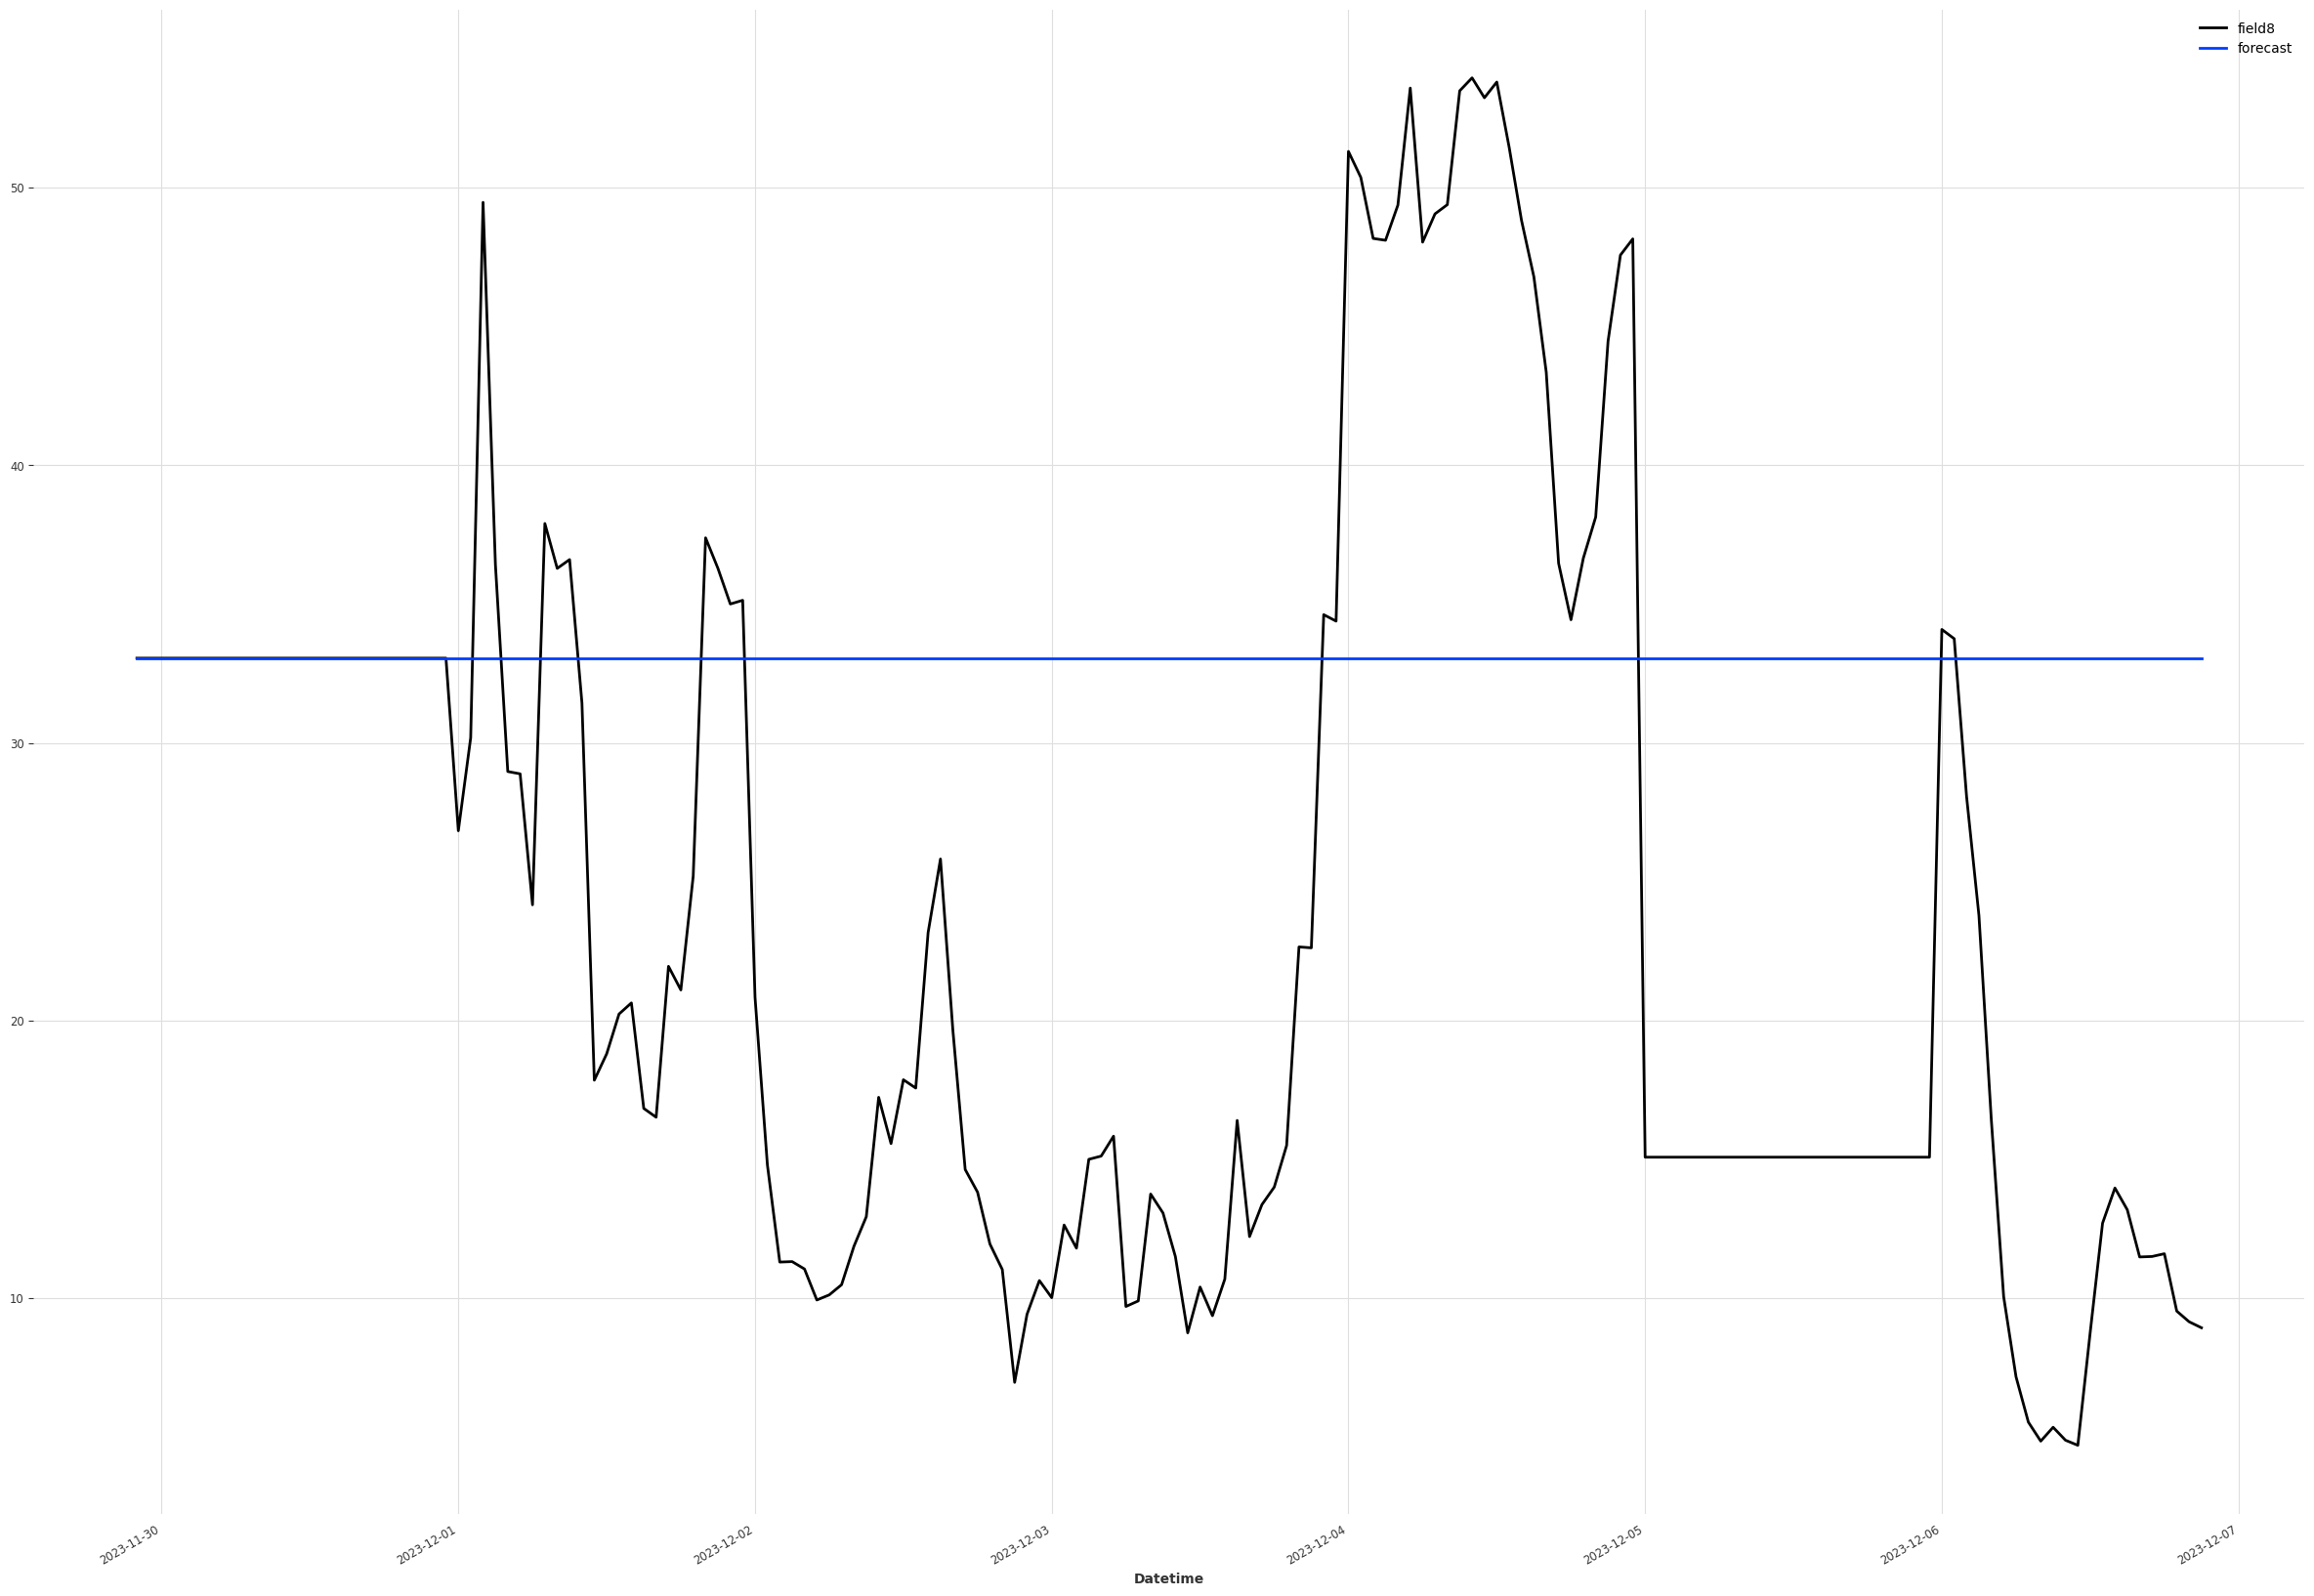

In [18]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()